The aim of the notebook is to use the inbuilt Augmentation features present in the ImageDataGenerator Class to check if we reduce overfitting 


Using the same architecture used in the previous notebook caps the max accuracy on validation at ~78 Changing the architecture to see if we get better resuts

The accuracy of the new architecture maxes out at 85 validation accuracy and it starts to overfit around the last 20 epochs 

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-07-18 05:51:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.164.144, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   189MB/s    in 0.3s    

2021-07-18 05:51:07 (189 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip /tmp/cats_and_dogs_filtered.zip

Archive:  /tmp/cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
### As seen earlier the data already has the train and the test set segregated 

## The Task this time would be to create a trining and a test generator, the train generator must employ augmentation to 


In [4]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip = True,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.2,
                               shear_range=0.1)
validate_gen = ImageDataGenerator(rescale=1./255)  #This should only have rescale otherwise we wouldn't 
                                                   #have exact data to compare our results against


In [12]:
train_data = train_gen.flow_from_directory('cats_and_dogs_filtered/train/',
                                           batch_size=20,
                                           target_size=(150,150),
                                           class_mode='binary')

validate_data = validate_gen.flow_from_directory('cats_and_dogs_filtered/validation/',
                                                 batch_size=10,
                                                 target_size=(150,150),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
### Defining model Architecture

cc_classifier = keras.Sequential([keras.layers.Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
                                  keras.layers.MaxPooling2D(2, 2),
                                  keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                  keras.layers.MaxPooling2D(2, 2),
                                  keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  keras.layers.MaxPooling2D(2, 2),
                                  keras.layers.Conv2D(128, (3,3), activation='relu'),
                                  keras.layers.MaxPooling2D(2, 2),
                                  keras.layers.Conv2D(256, (3,3), activation='relu'),
                                  keras.layers.MaxPooling2D(2, 2),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(512, activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')])

In [14]:
cc_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [15]:
cc_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
cc_classifier.fit_generator(train_data, 
                            steps_per_epoch=100, 
                            validation_data= validate_data, 
                            epochs=100, 
                            validation_steps=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6921 - accuracy: 0.5295 - val_loss: 0.6844 - val_accuracy: 0.5670
Epoch 2/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6908 - accuracy: 0.5395 - val_loss: 0.6948 - val_accuracy: 0.5110
Epoch 3/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6882 - accuracy: 0.5395 - val_loss: 0.8420 - val_accuracy: 0.5110
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6817 - accuracy: 0.5885 - val_loss: 0.6870 - val_accuracy: 0.5370
Epoch 5/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6825 - accuracy: 0.5615 - val_loss: 0.6886 - val_accuracy: 0.5370
Epoch 6/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6735 - accuracy: 0.5885 - val_loss: 0.6580 - val_accuracy: 0.6480
Epoch 7/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6565 - accuracy: 0.6260 - val_loss: 0.6434 -

In [20]:
train_acc = cc_classifier.history.history['accuracy']
val_acc = cc_classifier.history.history['val_accuracy']
train_loss = cc_classifier.history.history['loss']
val_loss = cc_classifier.history.history['val_loss']
epochs = range(len(val_loss))




In [21]:
import matplotlib.pyplot as plt

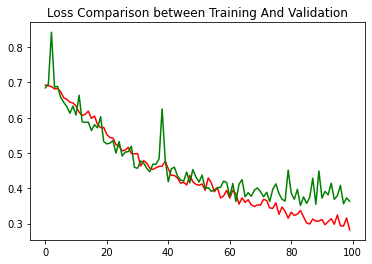

In [24]:
plt.plot(epochs, train_loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
plt.title("Loss Comparison between Training And Validation")
plt.show()


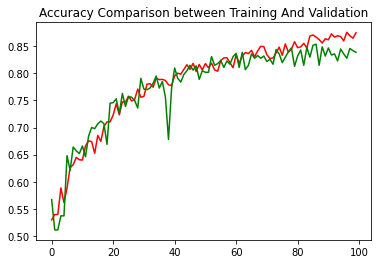

In [25]:
plt.plot(epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Validation Accuracy')
plt.title("Accuracy Comparison between Training And Validation")
plt.show()